# TAURUS 2018
# Introduction to Python Day 3
# Statistics, Interpolation & Fitting Data

Welcome back again! So far we have covered basic syntax, arrays, if statements, for loops, functions, and plotting. Now we can start building some data analysis skills using statistics. 

Python has lots of built in functions for generating random data. Today let's start with generating random values from a Gaussian distribution. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gaussian = np.random.normal(0, 2, 1000) #Gaussian centered on 0 with a std. dev. of 2, sampled 1000 times

## Histograms 

A plot you'll probably make quite often is a histogram. For this, use plt.hist().

    plt.hist(data, bins, normed=True/False)
    
The "bins" argument can either be an array, or simply setting "bins=x" for a number of evenly spaced bins. "Normed" will normalize your data to 1.

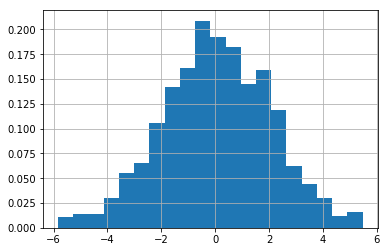

In [3]:
plt.hist(gaussian, bins=20, normed=True)
plt.grid(True)
plt.show()

Just like with normal plotting, there are lots of customizable options for histograms, including:

    facecolor: string argument giving color of histogram
    alpha: opacity, ranging from 0 to 1
    hatch: a histogram filling style, such as '\\', '//', '.', '..', etc
    histtype: bar, step
    normed: True/False
    cumulative: True/False
    
## Gaussian Fitting

Let's try fitting the Gaussian. This is a little bit redundant since we already know it's a Gaussian distribution, but this example should illustrate how the fitting process works. Let's use a package from scipy:

In [4]:
from scipy.stats import norm

Quick tip: if you're ever unsure about how to use a function, type ? after the function name to call up the docstrings.

To fit a Gaussian, simply use norm.fit(data). This will return the mean and standard deviation of the fit. np.average() and np.std() will give the mean and standard deviation of the actual data.

In [5]:
mu, sigma = norm.fit(gaussian)
print(mu, sigma)

(0.067335026886571878, 2.0202138423283311)


This did pretty well. It performs better the larger the sample you give it. 

Next, to overplot the Gaussian fit, you can calculate the probability density function (PDF).

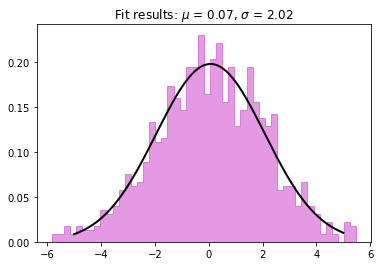

In [6]:
x = np.linspace(-5, 5, 1000)
pdf = norm.pdf(x, mu, sigma)

plt.plot(x, pdf, 'k', linewidth=2)
plt.hist(gaussian, bins=50, color='m', alpha=0.4, normed=True, fill=True, histtype='step')
plt.title("Fit results: $\mu$ = %.2f, $\sigma$ = %.2f" % (mu, sigma)) #This prints out the values of mu and sigma to 2
#decimal places.

plt.show()

## Quick aside: loading files into Python

Up until now, none of the exercises have required you to load in an outside file to the notebook, but this is definitely something you'll need to learn! You can use np.genfromtxt or np.loadtxt (I happen to like the former). If it's just a 1D array of floats, then simply np.genfromtxt('filename') will suffice. Other arguments include "dtype" which allows you to specify that they're strings or integers, and in a moment I'll show you how to transpose a text file.


### Exercise

There is a file in this directory called "histogram_exercise.dat" which consists of of randomly generated samples from a Gaussian distribution with an unknown $\mu$ and $\sigma$. Using what you've just learned, load up this file using np.genfromtxt, fit a Gaussian curve to the data and plot both the curve and the histogram of the data. As always, label everything, play with the colors, and choose a judicious bin size. 

In [7]:
# solution here

values = np.genfromtxt('histogram_exercise.dat')

mu2, sigma2 = norm.fit(values)
print(mu2, sigma2)

x2 = np.linspace(mu2 - 5, mu2 + 5, 1000)
curve = norm.pdf(x2, mu2, sigma2)

plt.hist(values, facecolor='m', alpha=0.5, normed=True)
plt.plot(x2, curve, "-k", label='$\mu = %.2f, \sigma = %.2f$' % (mu2, sigma2))

plt.legend()


(5.0434295793242176, 1.9340244153304138)


## Interpolating Data

You may encounter a situation in your research where you will need to interpolate a model to interpret your data. The scipy library has many different interpolating (and extrapolating) algorithms, but the simplest is a 1D interpolation, called interp1d. 

Let's first generate a well-behaved function that will be easy to interpolate along.

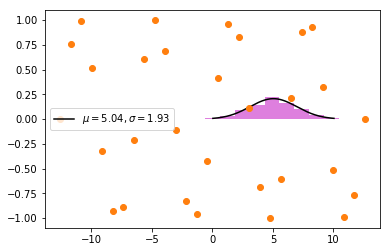

In [8]:
xarray = np.linspace(-4*np.pi, 4*np.pi, 30)
yarray = np.sin(xarray)

plt.plot(xarray, yarray, 'o')
plt.show()

What do you notice about this plot? Well, at first glance it doesn't really look like a sine curve because it is poorly sampled. Of course, since we already know it's a sine curve, we could just sample the function better, but say you didn't have such a nice function. Interp1d comes to the rescue! 

In [9]:
from scipy.interpolate import interp1d

There are a few steps to interpolation. First, the interp1d function interpolates your original y array. Then, you need to define the new array along which to interpolate, which must completely fit inside the original array (or else it's extrapolation). We'll take the same array but grid it more finely. Finally, you create a new y array using the interpolated function.

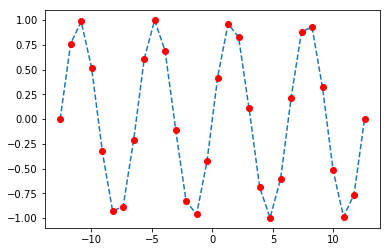

In [10]:
interp = interp1d(xarray, yarray)
xnew = np.linspace(-4*np.pi, 4*np.pi, 1000)
ynew = interp(xnew)

plt.plot(xnew, ynew, '--')
plt.plot(xarray, yarray, 'or')
plt.show()

Now it looks much closer to a sine curve!

### Exercise

Try interpolating along these arrays. Plot both the data (as points) and the interpolation (as a dotted line). What does it look like to you?



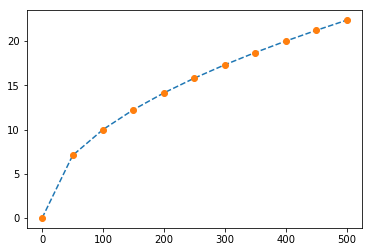

In [11]:
x = np.array([0., 50., 100., 150., 200., 250., 300., 350., 400., 450., 500])
y = np.array([0., 7.071, 10., 12.247, 14.142, 15.811, 17.321, 18.708, 20., 21.213, 22.361])

# solution here

interp2 = interp1d(x,y)
xnew2=np.linspace(0,500,100)
ynew2=interp2(xnew2)

plt.plot(xnew2,ynew2, '--')
plt.plot(x,y,'o')
plt.show()

## Fitting a Spectrum

Finally we can put what we've learned together to do a real life astronomy example! Here is a sample spectrum which features a prominent spectral emission line. Our job will be to fit the line with a Gaussian model to compute its peak flux and FWHM. 

First let's load up the spectrum. Python reads by rows, not columns, but if you want separate arrays indicating the columns such as wavelengths, flux, and flux errors, you can transpose it, by doing np.genfromtxt('filename').T. You can define it all in one line, like so:

x, y, z = np.genfromtxt('file_with_three_columns.txt').T

Try loading up "test_spectrum.txt", whose three columns are wavelength, flux, and error.

In [12]:
# load file here

wave, flux, fluxerr = np.genfromtxt('test_spectrum.txt').T

#alternatively:
file = np.genfromtxt('test_spectrum.txt').T
wave_alt = file[0]; flux_alt = file[1]; fluxerr_alt = file[2]

Let's plot up what we have so far. This is a great opportunity to show you another useful plotting tool: errorbars! 

Instead of doing plt.plot, you can do plt.errorbar, which plots both the data and the errorbars. The first two arguments are x and y like in plt.plot, and the next two arguments are xerr and yerr. You can specify the color of the errorbars using "ecolor". 

### Question 1: Try plotting the spectrum with y errors (it doesn't have x errors) with the data in blue and the errorbars in magenta.

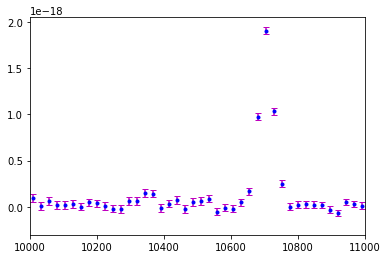

In [13]:
# your plot here

plt.plot(wave, flux, '.b')
plt.errorbar(wave, flux, yerr=fluxerr, fmt='none', ecolor='m', capsize=3)
plt.xlim(10000, 11000)
plt.show()

We're going to use the optimize function from scipy. This allows you to fit pretty much any kind of function you want, but here we know that the emission line has a Gaussian profile. Import the optimize function from scipy as "opt", and using what you learned yesterday, define a Gaussian function which takes as its arguments x, $f_0$, $\mu$, and $\sigma$. $f_0$ is a normalizing factor in front of the Normal distribution. When you use optimize, it's important that the first argument is the array you're fitting along, so here that is x. 

In [14]:
# solution here

def gauss(x, f0, mu, sigma):
    expterm = np.exp( - (x - mu)**2 / (2 * sigma**2 ))
    return f0 * expterm

The optimize function finds the best fit parameters as well as the covariance matrix for those parameters. p0 is the initial guess for the fit - this is important because a bad or no first guess will cause a bad fit. So the rest of the fit goes like so:

See if you can guess a good p0!

In [15]:
from scipy import optimize as opt 

bfpars, covar = opt.curve_fit(gauss, wave, flux, p0=[2e-18, 10700, 50], sigma=fluxerr)

print(bfpars)

[  1.87965710e-18   1.07037446e+04   2.18701341e+01]


Try printing out the best fit parameters. Does this make sense to you? 

Similar to interpolating, let's define a higher resolution wavelength grid we can use to overplot the fit. We can also zoom in on the line since the rest of the spectrum is noise:

In [16]:
x = np.linspace(bfpars[1]-10*bfpars[2], bfpars[1]+10*bfpars[2], 1000) #Center the grid on the wavelength of the line
#and go +- 10*sigma from there

modelfit = gauss(x, bfpars[0], bfpars[1], bfpars[2]) #This is the Gaussian curve with the best fit parameters


As your final task, plot the model over the data, making sure you zoom in on the line by choosing a wise range for xlim. Congrats, you've done your first bit of science with Python!

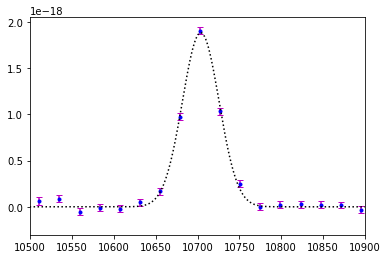

In [17]:
# solution here

plt.plot(wave, flux, '.b')
plt.errorbar(wave, flux, yerr=fluxerr, fmt='none', ecolor='m', capsize=3)
plt.plot(x, modelfit, ':k')
plt.xlim(10500, 10900)
plt.show()